In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import os

In [3]:
os.chdir('/Users/pablobasulto/Desktop/Bases de datos')

In [6]:
os.listdir()

['archive (2).zip',
 '.DS_Store',
 'Student_Performance.csv',
 'Scatter Plots.png',
 'CMAPSSData',
 'Accidentes_Vehiculos.csv',
 'Salary_dataset.csv',
 'simplelinearregression.csv',
 'movies.csv']

In [8]:
data = pd.read_csv('Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [25]:
#data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0}) 
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


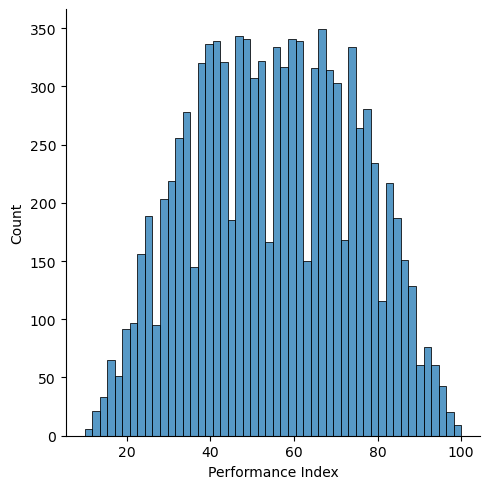

In [14]:
sns.displot(data['Performance Index'],bins = 50)
plt.show()

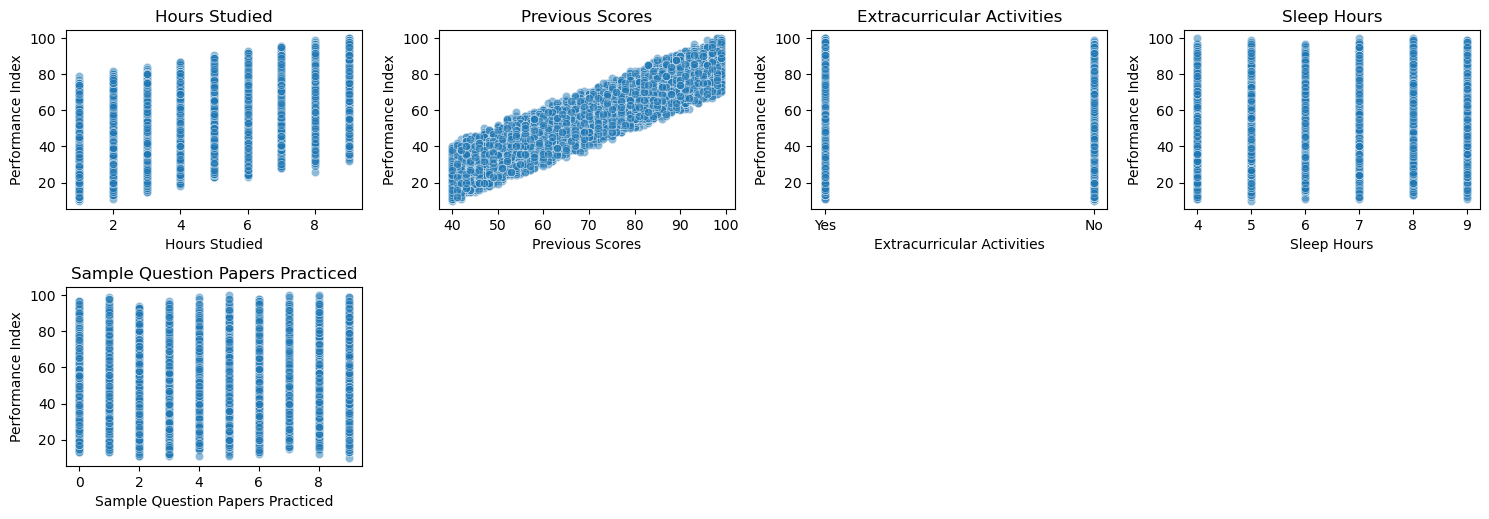

In [18]:
#Diagrmas de dispersión de cada variable predictoria con respecto a la variable a predecir
predictores = data.columns.drop('Performance Index')
plt.figure(figsize=(15, 10))

for i,col in enumerate(predictores, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(x = data[col], y = data['Performance Index'], alpha = .5)
    plt.title(col)

plt.tight_layout()
plt.show()


In [27]:
#Creación de una función que determina el cálculo del VIF con respecto a cada parámetro, con el fin de detetcar multicolinealidad 
def calculoVIF(datos, variable_dependiente):
    X = datos.drop(variable_dependiente, axis = 1)
    
    vif_data = pd.DataFrame()
    vif_data['Variable'] = datos.columns.drop(variable_dependiente)
    vif_data['VIF'] =  [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data
calculoVIF(data, 'Performance Index')

,Variable,VIF
0,Hours Studied,4.263244
1,Previous Scores,10.088586
2,Extracurricular Activities,1.928235
3,Sleep Hours,9.833594
4,Sample Question Papers Practiced,3.350481


In [29]:
for columna in data.drop('Performance Index', axis = 1).columns:
    print('Valor VIF sin la variable', columna, '\n')
    print(calculoVIF(data.drop(columna, axis = 1), 'Performance Index'), "\n")

Valor VIF sin la variable Hours Studied 

                           Variable       VIF
0                   Previous Scores  9.433656
1        Extracurricular Activities  1.921697
2                       Sleep Hours  9.179774
3  Sample Question Papers Practiced  3.316724 

Valor VIF sin la variable Previous Scores 

                           Variable       VIF
0                     Hours Studied  3.986483
1        Extracurricular Activities  1.885735
2                       Sleep Hours  5.564233
3  Sample Question Papers Practiced  3.192847 

Valor VIF sin la variable Extracurricular Activities 

                           Variable       VIF
0                     Hours Studied  4.248789
1                   Previous Scores  9.866227
2                       Sleep Hours  9.736833
3  Sample Question Papers Practiced  3.340441 

Valor VIF sin la variable Sleep Hours 

                           Variable       VIF
0                     Hours Studied  3.979787
1                   Previous Sc

In [35]:
#Se puede observar que cuando eliminamos la variable 'Sleep Hours' es cuando menos multicolinealidad tenemos
data_limpio = data.drop('Sleep Hours', axis = 1)

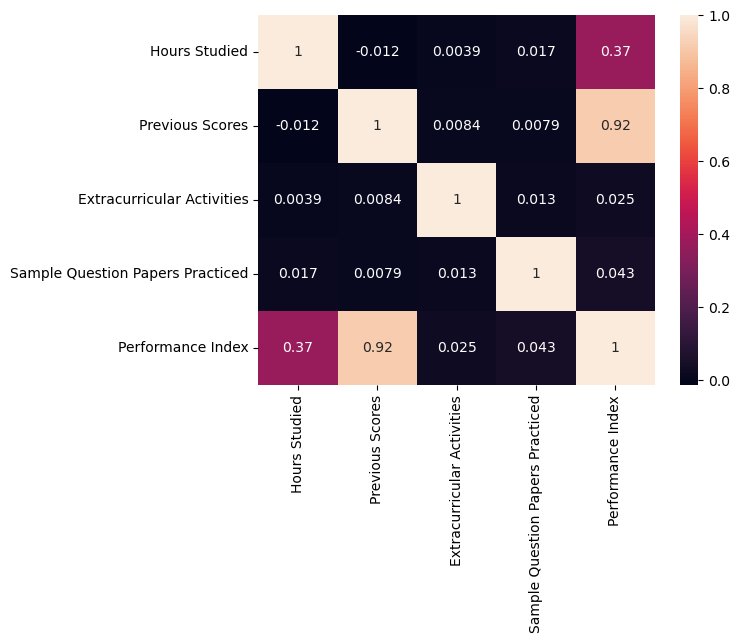

In [37]:
#Visulización de la matriz de correlación de Pearson para determinar cuales variables aportan más colinealidad
data_limpio_corr = data_limpio.corr().round(2)
sns.heatmap(data = data_limpio.corr(), annot = True)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [45]:
#Dejáos únicamente las variables que sean mayorea .3
cond = abs(data_limpio_corr['Performance Index'].values) > .3
data_limpio = data_limpio[data_limpio.columns[cond]]

In [47]:
data_limpio

,Hours Studied,Previous Scores,Performance Index
0,7,99,91.0
1,4,82,65.0
2,8,51,45.0
3,5,52,36.0
4,7,75,66.0
...,...,...,...
9995,1,49,23.0
9996,7,64,58.0
9997,6,83,74.0
9998,9,97,95.0


In [131]:
#Volvemos a analizar la multicolinealidad:
calculoVIF(data_limpio, 'Performance Index')

,Variable,VIF
0,Hours Studied,3.837797
1,Previous Scores,3.837797


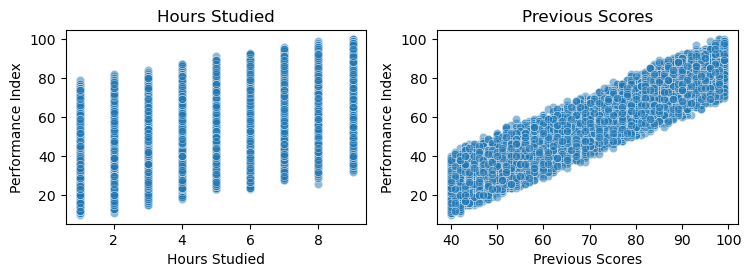

In [133]:
predictores = data_limpio.columns.drop('Performance Index')
plt.figure(figsize=(15, 10))

for i,col in enumerate(predictores, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(x = data[col], y = data_limpio['Performance Index'], alpha = .5)
    plt.title(col)

plt.tight_layout()
plt.show()

In [51]:
print(f"La relación lineal entre las variables predictorias es: {abs(data_limpio_corr.loc['Hours Studied', 'Previous Scores'])}")

La relación lineal entre las variables predictorias es: 0.01
